In [1]:
import pyreadr as py
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#reading train data in .R format
a1=py.read_r("E:/Master Arbeit (Maschinenbau)/TEP Data/dataverse_files/TEP_FaultFree_Training.RData")
a2=py.read_r("E:/Master Arbeit (Maschinenbau)/TEP Data/dataverse_files/TEP_Faulty_Training.RData")

#reading test data in .R format
a3=py.read_r("E:/Master Arbeit (Maschinenbau)/TEP Data/dataverse_files/TEP_FaultFree_Testing.RData")
a4=py.read_r("E:/Master Arbeit (Maschinenbau)/TEP Data/dataverse_files/TEP_Faulty_Testing.RData")

In [4]:
#REading the .Rdata files in pandas dataframe and saving it in .csv file
#reading train data
b1 = a1['fault_free_training']
b2 = a2['faulty_training']

#reading test data
b3 = a3['fault_free_testing']
b4 = a4['faulty_testing']

In [5]:
b1.drop(['faultNumber','simulationRun','sample'],axis=1,inplace=True)

In [6]:
b3.drop(['faultNumber','simulationRun','sample'],axis=1,inplace=True)

In [7]:
def normalization_data(data,eta=2):
    data_normalized=np.copy(data)
    shape0=data.shape[0]
    shape1=data.shape[1]
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    for i in range(shape1):
        for j in range(shape0):
            data_normalized[j,i]=(data[j,i]-mean[i])/(std[i]*eta)
    return data_normalized

In [8]:
b1

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,75.533,120.41,0.34050,...,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,75.935,120.39,0.35374,...,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,74.706,120.41,0.35910,...,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,75.101,120.39,0.32469,...,53.453,24.889,61.564,21.392,39.334,42.274,43.623,48.797,39.835,18.512


In [9]:
b2

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,20,500.0,496,0.23419,3655.3,4461.7,9.3448,27.008,42.481,2703.0,...,53.670,23.350,61.061,20.719,40.999,38.653,47.386,47.528,40.212,17.659
4999996,20,500.0,497,0.26704,3647.4,4540.2,9.3546,27.034,42.671,2704.7,...,54.650,26.362,60.020,20.263,41.579,33.624,47.536,47.647,41.199,18.741
4999997,20,500.0,498,0.26543,3630.3,4571.6,9.4089,27.129,42.470,2705.1,...,54.274,26.521,59.824,20.189,41.505,40.967,52.437,47.802,41.302,23.199
4999998,20,500.0,499,0.27671,3655.7,4498.9,9.3781,27.353,42.281,2705.8,...,53.506,26.781,62.818,20.453,40.208,40.957,47.628,48.086,40.510,15.932


In [10]:
b3

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,0.26428,3671.5,4510.8,9.2852,27.141,42.297,2699.9,74.296,120.41,0.33822,...,53.942,26.022,61.709,22.417,40.510,36.731,50.115,52.721,40.927,18.854
479996,0.25132,3573.4,4483.9,9.2872,26.604,42.311,2698.1,74.629,120.40,0.33728,...,53.760,24.585,61.267,21.928,39.893,34.136,47.714,52.908,41.412,18.847
479997,0.25105,3622.6,4433.3,9.3998,26.707,41.936,2699.5,75.484,120.38,0.33560,...,54.366,24.613,61.745,22.212,40.098,35.585,48.241,53.099,40.150,16.791
479998,0.24521,3660.5,4485.2,9.3885,26.936,42.639,2700.5,74.614,120.39,0.33390,...,53.289,24.371,62.811,22.249,39.536,35.609,46.495,53.157,41.065,17.097


In [11]:
b4

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599995,20,500.0,956,0.26494,3719.6,4536.7,9.2265,26.875,42.401,2708.3,...,54.382,26.018,62.068,20.708,37.589,35.121,45.496,42.653,40.816,15.846
9599996,20,500.0,957,0.25252,3724.0,4494.3,9.1873,27.221,41.999,2706.0,...,54.236,25.098,61.557,20.655,40.934,38.391,43.699,42.832,41.853,18.486
9599997,20,500.0,958,0.25164,3700.8,4537.3,9.2514,26.659,42.180,2704.7,...,53.722,25.185,61.169,20.650,40.694,35.961,45.643,43.147,40.538,18.127
9599998,20,500.0,959,0.29097,3641.8,4525.2,9.3053,26.823,42.234,2705.0,...,54.185,28.771,61.140,20.323,39.774,39.807,45.989,43.318,40.826,17.305


In [46]:
# fault_free_train_sample_size=20000
# fault_free_train_sample_size=40000
# fault_free_train_sample_size=100000
# fault_free_train_sample_size=200000
fault_free_train_sample_size=250000
fault_free_train=b1.to_numpy()[:fault_free_train_sample_size,:]
fault_free_train_normalized=normalization_data(fault_free_train)
fault_free_train_normalized.shape

(250000, 52)

In [47]:
# fault_free_train.shape

(250000, 52)

In [48]:
np.savetxt("fault_free_train_sample_size=250000",fault_free_train,delimiter=",")

In [12]:
# fault_free_train_normalized.shape

(20000, 52)

In [63]:
# fault_free_train

(250000, 52)

In [77]:
pd.read_csv("faulty_train=10%", sep=",",header=None).to_numpy().shape

(470400, 52)

In [78]:
# faulty_train.shape

(470400, 52)

In [14]:
fault_free_test_sample_size=480000
fault_free_test1=b3.to_numpy()[:fault_free_test_sample_size,:]
fault_free_test1_normalized=normalization_data(fault_free_test1)
fault_free_test1_normalized.shape

(480000, 52)

In [15]:
np.savetxt("fault_free_test_sample_size=480000",fault_free_test1,delimiter=",")

In [52]:
fault_free_test2=b3.to_numpy()[fault_free_test_sample_size:2*fault_free_test_sample_size,:]
fault_free_test2_normalized=normalization_data(fault_free_test2)
fault_free_test2_normalized.shape

(20000, 52)

In [53]:
np.savetxt("fault_free_test2=20000",fault_free_test2,delimiter=",")

In [13]:
train=pd.concat([b2])
frame = []
for i in set(train['faultNumber']):
    b_i = pd.DataFrame()
    if i!=0:
        fr = []
        b = train[train['faultNumber'] == i]
        for x in range(1,50):
            b_x = b[b['simulationRun'] == x][20:500]
#             b_x = b[b['simulationRun'] == x][0:20]
            fr.append(b_x)
        b_i = pd.concat(fr)
    frame.append(b_i)      
frames_train = pd.concat(frame)
frames_train.drop(['faultNumber','simulationRun','sample'],axis=1,inplace=True)


# faulty_test=b4.to_numpy()[:faulty_test_sample_size,:]
faulty_train=frames_train.to_numpy()[:,:]

faulty_train_normalized=normalization_data(faulty_train)
faulty_train_normalized.shape

(9600, 52)

In [15]:
np.savetxt("faultytrain_faultyfree0-20",faulty_train,delimiter=",")

In [16]:
test=pd.concat([b4])
frame = []
for i in set(test['faultNumber']):
    b_i = pd.DataFrame()
    if i!=0:
        fr = []
        b = test[test['faultNumber'] == i]
        for x in range(1,500):
#             b_x = b[b['simulationRun'] == x][160:960]
            b_x = b[b['simulationRun'] == x][:160]
            fr.append(b_x)
        b_i = pd.concat(fr)
    frame.append(b_i)      
frames_test = pd.concat(frame)
frames_test.drop(['faultNumber','simulationRun','sample'],axis=1,inplace=True)


# faulty_test=b4.to_numpy()[:faulty_test_sample_size,:]
faulty_test=frames_test.to_numpy()[:,:]

faulty_test_normalized=normalization_data(faulty_test)
faulty_test_normalized.shape

(1596800, 52)

In [17]:
np.savetxt("faultytest_faultfree0-160",faulty_test,delimiter=",")

In [17]:
def data_timesteps_prep(train_normalized_2D, time_steps):
    shape0_old=train_normalized_2D.shape[0]
    shape1_old=train_normalized_2D.shape[1]
    
    shape0=int(shape0_old/time_steps)
    shape1=time_steps
#     counter=shape
    shape2=shape1_old
    train_normalized_3D=np.zeros((shape0,shape1,shape2))
#     print(shape0)
    
    row_index=0
    for i in range(shape0):
#         for j in range(shape1):
        train_normalized_3D[i, :, :]=train_normalized_2D[row_index:row_index+time_steps,:]
        row_index=row_index+time_steps
    return train_normalized_3D

In [18]:
def data_timesteps_inv(train_normalized_3D):
    time_steps=train_normalized_3D.shape[1]
    features=train_normalized_3D.shape[2]
    rows=train_normalized_3D.shape[0]*time_steps
    train_normalized_2D=np.zeros((rows,features))
    for i in range(train_normalized_3D.shape[0]):
        train_normalized_2D[i*time_steps:i*time_steps+time_steps,:]=train_normalized_3D[i,:,:]
    return train_normalized_2D

In [19]:
def plot_pred_3D(plot_range, feature, data_normalized_3D, data_normalized_pred_3D, label1, label2, if_faultFree):
#     plot_range=1000
#     plot_range=fault_free_train_normalized.shape[0]
#     feature=0
#     plt.figure()

    data_normalized=data_timesteps_inv(data_normalized_3D)
    data_normalized_pred=data_timesteps_inv(data_normalized_pred_3D)
    fig, (ax1, ax2, ax3) = plt.subplots(3)
#     fig, (ax1, ax2) = plt.subplots(2)

    if if_faultFree:
        ax1.plot(range(plot_range),data_normalized[:plot_range,feature],label=label1, color='y')
        ax1.legend()

        ax2.plot(range(plot_range),data_normalized_pred[:plot_range,feature],label=label2, color='b')
        ax2.legend()

        ax3.plot(range(plot_range),data_normalized[:plot_range,feature],label=label1, color='y')
        ax3.plot(range(plot_range),data_normalized_pred[:plot_range,feature],label=label2, color='b')
        ax3.legend()
    else:
        ax1.plot(range(plot_range),data_normalized[:plot_range,feature],label=label1, color='r')
        ax1.legend()

        ax2.plot(range(plot_range),data_normalized_pred[:plot_range,feature],label=label2, color='g')
        ax2.legend()

        ax3.plot(range(plot_range),data_normalized[:plot_range,feature],label=label1, color='r')
        ax3.plot(range(plot_range),data_normalized_pred[:plot_range,feature],label=label2, color='g')
        ax3.legend()
    
    plt.show()

In [20]:
def pred_error_3D(threshold,feature_list, plot_range, data_normalized_3D, data_normalized_pred_3D, label):
#     data_loss=np.mean(np.abs(data_normalized-data_normalized_pred), axis=1)
#     data_loss=np.mean(np.square(data_normalized-data_normalized_pred), axis=1)
    
    data_normalized=data_timesteps_inv(data_normalized_3D)
    data_normalized_pred=data_timesteps_inv(data_normalized_pred_3D)

#     print(data_normalized.shape)
#     print(data_normalized_pred)
    
    i=0
    data_loss=np.zeros(shape=(data_normalized.shape[0],len(feature_list)))
    for feature in feature_list:
        data_loss[:,i]=data_normalized[:,feature]-data_normalized_pred[:,feature]
        i=i+1
    data_loss=np.mean(np.square(data_loss),axis=1)
#     plt.plot(np.arange(plot_range),data_loss[:plot_range], label=label)
#     plt.grid()
#     plt.legend()
    anomaly_points = data_loss > threshold
#     print(anomaly_points.sum())
    s=label+": "+str(anomaly_points.sum()/data_loss.shape[0])
    print(s)
    return anomaly_points.sum()/data_loss.shape[0]

In [21]:
def fit_epochs_3D(model, epochs, epochs_step, plot_range, fault_free_train_normalized_3D, fault_free_test1_normalized_3D, fault_free_test2_normalized_3D, faulty_train_normalized_3D, faulty_test_normalized_3D, threshold=0.0032, feature_list=[0,43]):
    false_alarm=np.zeros(1)
    detection_rate=np.zeros(1)
    
    for epoch in range(epochs_step, epochs, epochs_step):
        model.fit(fault_free_train_normalized_3D, fault_free_train_normalized_3D, epochs=epochs_step,verbose=2)
        
        fault_free_train_normalized_pred_3D=model.predict(fault_free_train_normalized_3D)
        fault_free_test1_normalized_pred_3D=model.predict(fault_free_test1_normalized_3D)
        fault_free_test2_normalized_pred_3D=model.predict(fault_free_test2_normalized_3D)
        faulty_train_normalized_pred_3D=model.predict(faulty_train_normalized_3D)
        faulty_test_normalized_pred_3D=model.predict(faulty_test_normalized_3D)
        
        Status_Info="Epoch: "+ str(epoch)
        print()
        print(Status_Info)
        
#         pred_error_3D(threshold, feature_list, plot_range, fault_free_train_normalized_3D, fault_free_train_normalized_pred_3D, 'fault_free_train')
#         pred_error_3D(threshold, feature_list, plot_range, fault_free_test1_normalized_3D, fault_free_test1_normalized_pred_3D, 'fault_free_test1')
        f_temp=pred_error_3D(threshold, feature_list, plot_range, fault_free_test2_normalized_3D, fault_free_test2_normalized_pred_3D, 'fault_free_test2')
#         pred_error_3D(threshold, feature_list, plot_range, faulty_train_normalized_3D, faulty_train_normalized_pred_3D, 'faulty_train')
        d_temp=pred_error_3D(threshold, feature_list, plot_range, faulty_test_normalized_3D, faulty_test_normalized_pred_3D, 'faulty_test')
        
        false_alarm=np.append(false_alarm,f_temp)
        detection_rate=np.append(detection_rate,d_temp)
        
    x_axis=list(range(epochs_step, epochs, epochs_step))
    plt.figure(figsize=(5,5))
    plt.plot(x_axis, false_alarm[1:], label = "False Alarm")
    plt.plot(x_axis, detection_rate[1:], label = "Detection Rate")
    plt.grid()
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.show()
    return false_alarm[1:],detection_rate[1:]

--------------------

In [22]:
time_steps=1
features=52

fault_free_train_normalized_3D=data_timesteps_prep(fault_free_train_normalized, time_steps)
fault_free_test1_normalized_3D=data_timesteps_prep(fault_free_test1_normalized, time_steps)
fault_free_test2_normalized_3D=data_timesteps_prep(fault_free_test2_normalized, time_steps)
faulty_train_normalized_3D=data_timesteps_prep(faulty_train_normalized, time_steps)
faulty_test_normalized_3D=data_timesteps_prep(faulty_test_normalized, time_steps)

In [23]:
print(fault_free_train_normalized_3D.shape)
print(fault_free_train_normalized)

(20000, 1, 52)
[[-0.0013686   0.15729311  0.2483067  ... -0.08280685  0.1438597
   0.11228948]
 [ 0.01009941 -0.05637969  0.59614192 ... -0.09758485  0.23704927
  -0.31616177]
 [-0.0013686  -0.04320808 -0.39695282 ... -0.09028488  0.08942222
   0.82455122]
 ...
 [-0.03431893  0.3475497  -0.18396677 ...  0.01351726 -0.62749162
   0.90182974]
 [ 0.29599197 -0.43689289  0.31384087 ...  0.06871223  0.19091582
  -0.3257361 ]
 [ 0.31553604 -0.17346067 -0.06424088 ...  0.18212897  0.65963169
   1.28446099]]


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               92672     
_________________________________________________________________
dense (Dense)                (None, 300)               38700     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 300)            0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 300)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 52)             15652     
Total params: 147,024
Trainable params: 147,024
Non-trainable params: 0
_________________________________________________________________
None


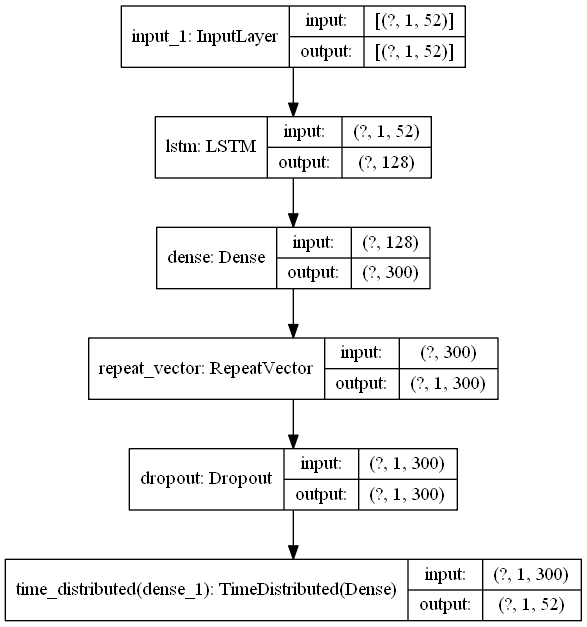

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    min_delta=0.0001, 
    mode='min'
)

batch_size_set=False
# batch_size_set=True
# batch_size=1
# batch_size=fault_free_train_normalized.shape[0]/time_steps/(500/time_steps)
# print(batch_size)

# ----------------------------------------

# use as baseline
# best result: 
# Epoch: 220
# fault_free_test2: 0.20745
# faulty_test: 0.8565063775510204
    
model = keras.Sequential()

if batch_size_set==True:
    model.add(keras.layers.Input(shape=(time_steps, features), batch_size=batch_size))
else:
    model.add(keras.layers.Input(shape=(time_steps, features)))

# model.add(keras.layers.Dropout(0.2))

if batch_size_set==True:
    model.add(keras.layers.LSTM(128, batch_input_shape=(batch_size, time_steps, features), return_sequences=False))
else:
    model.add(keras.layers.LSTM(128, input_shape=(time_steps, features), return_sequences=False))

# model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(300, activation='sigmoid'))

model.add(keras.layers.RepeatVector(time_steps))

model.add(keras.layers.Dropout(0.2))

# model.add(keras.layers.LSTM(128,input_shape=(time_steps,80),return_sequences=True))

# model.add(keras.layers.Dense(features, activation='tanh'))

model.add(keras.layers.TimeDistributed(keras.layers.Dense(52, activation='tanh')))

# ----------------------------------------

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
print(model.summary())
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
epochs=300
epochs_step=20
plot_range=1000
threshold=0.0032
feature_list=[0,43]

fit_epochs_3D(model, epochs, epochs_step, plot_range, fault_free_train_normalized_3D, fault_free_test1_normalized_3D, fault_free_test2_normalized_3D, faulty_train_normalized_3D, faulty_test_normalized_3D, threshold, feature_list)

Train on 20000 samples
Epoch 1/20
20000/20000 - 8s - loss: 0.1465 - accuracy: 0.1975
Epoch 2/20
20000/20000 - 3s - loss: 0.0454 - accuracy: 0.4789
Epoch 3/20
20000/20000 - 3s - loss: 0.0341 - accuracy: 0.5576
Epoch 4/20
20000/20000 - 3s - loss: 0.0307 - accuracy: 0.5817
Epoch 5/20
20000/20000 - 3s - loss: 0.0290 - accuracy: 0.5943
Epoch 6/20
20000/20000 - 3s - loss: 0.0279 - accuracy: 0.6031
Epoch 7/20
20000/20000 - 3s - loss: 0.0273 - accuracy: 0.6029
Epoch 8/20
20000/20000 - 3s - loss: 0.0267 - accuracy: 0.6068
Epoch 9/20
20000/20000 - 3s - loss: 0.0261 - accuracy: 0.6144
Epoch 10/20
20000/20000 - 3s - loss: 0.0257 - accuracy: 0.6197
Epoch 11/20
20000/20000 - 3s - loss: 0.0253 - accuracy: 0.6147
Epoch 12/20
20000/20000 - 5s - loss: 0.0249 - accuracy: 0.6237
Epoch 13/20
20000/20000 - 5s - loss: 0.0247 - accuracy: 0.6186
Epoch 14/20
20000/20000 - 4s - loss: 0.0247 - accuracy: 0.6174
Epoch 15/20
20000/20000 - 4s - loss: 0.0243 - accuracy: 0.6223
Epoch 16/20
20000/20000 - 4s - loss: 0.02

In [ ]:
# model.fit(fault_free_train_normalized_3D, fault_free_train_normalized_3D, epochs=200,verbose=2)
# model.fit(fault_free_train_normalized_3D, fault_free_train_normalized_3D, epochs=500,verbose=2,validation_data=(fault_free_test1_normalized_3D, fault_free_test1_normalized_3D),callbacks=[custom_early_stopping])

# ----------------------------------------

# fault_free_train_normalized_pred_3D=model.predict(fault_free_train_normalized_3D)
# fault_free_test1_normalized_pred_3D=model.predict(fault_free_test1_normalized_3D)
# fault_free_test2_normalized_pred_3D=model.predict(fault_free_test2_normalized_3D)
# faulty_train_normalized_pred_3D=model.predict(faulty_train_normalized_3D)
# faulty_test_normalized_pred_3D=model.predict(faulty_test_normalized_3D)

# ----------------------------------------

# plot_range=500
# chosen_list=[0,43]
# for feature in range(52):
# # for feature in chosen_list:
#     print(feature)
#     plot_pred_3D(plot_range,feature, fault_free_train_normalized_3D,fault_free_train_normalized_pred_3D, 'fault_free_train_normalized','fault_free_train_normalized_pred',True)
#     plot_pred_3D(plot_range,feature,fault_free_test1_normalized_3D,fault_free_test1_normalized_pred_3D, 'fault_free_test1_normalized','fault_free_test1_normalized_pred',True)
#     plot_pred_3D(plot_range,feature,faulty_train_normalized_3D,faulty_train_normalized_pred_3D, 'faulty_train_normalized','faulty_train_normalized_pred',False)
# #     plot_pred_3D(plot_range,feature,faulty_test_normalized_3D,faulty_test_normalized_pred_3D, 'faulty_test_normalized','faulty_test_normalized_pred',False)
#     print("----------------------------------------")

# ----------------------------------------

# threshold=0.0036
# plot_range=20000
# feature_list=[0,43]
# # feature_list=[0,18,20,43,45]
# pred_error_3D(threshold, feature_list, plot_range, fault_free_train_normalized_3D, fault_free_train_normalized_pred_3D, 'fault_free_train')
# pred_error_3D(threshold, feature_list, plot_range, fault_free_test1_normalized_3D, fault_free_test1_normalized_pred_3D, 'fault_free_test')
# pred_error_3D(threshold, feature_list, plot_range, fault_free_test2_normalized_3D, fault_free_test2_normalized_pred_3D, 'fault_free_test')
# pred_error_3D(threshold, feature_list, plot_range, faulty_train_normalized_3D, faulty_train_normalized_pred_3D, 'faulty_train')
# pred_error_3D(threshold, feature_list, plot_range, faulty_test_normalized_3D, faulty_test_normalized_pred_3D, 'faulty_test')